<a href="https://colab.research.google.com/github/BroccoliWarrior/transformer-basic-knowledge/blob/main/Encoder%26Decoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Transformer***

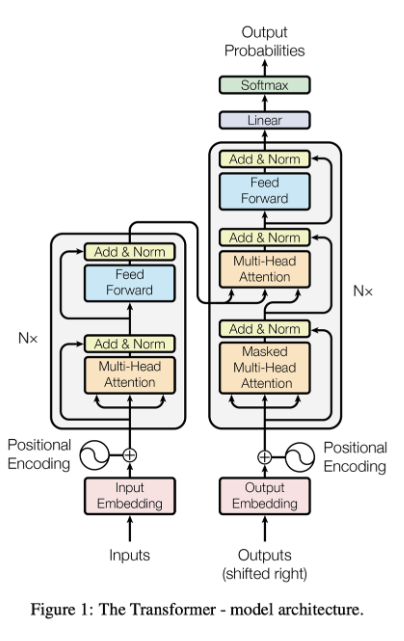

Encoder—Decoder架构，用于将一个序列转换为另一个序列

1. **Encoder**：负责对输入序列进行特征提取，得到一系列隐藏向量表示

2. **Decoder**：逐步生成目标序列的每个token

        * 二者直接通过“Encoder-Decoder Attention（Cross Attention）”子层进行信息交互

        * Decoder可以访问Encoder的输出，帮助生成词时关注输入序列中最相关的部分



**结构区别**

| 结构   | Encoder 结构简述                                                                 | Decoder 结构简述                                                                 |
| :-----: | :---------------------------------------------------------------------------------: | :---------------------------------------------------------------------------------: |
| 级联方式 | 多个 Encoder Block 级联                                                           | 多个 Decoder Block 级联                                                           |
| 子模块   | a. 多头自注意力（Multi-Head Self-Attention）<br>b. 前馈网络（Feed Forward Network, FFN） | a. 多头自注意力（带 look-ahead mask），即只可看到已生成或当前 step 以前的 Token<br>b. 编码器-解码器注意力（Encoder-Decoder Attention）<br>c. 前馈网络（Feed Forward Network, FFN） |
| 训练机制 | 通过 Add & Norm（残差连接与 LayerNorm）保持稳定训练并加速收敛                      | 同样有 Add & Norm 机制                                                            |
| 核心特征 | 全局看待输入序列，无未来信息屏蔽（无 Mask）                                        | 要在生成目标序列时，不能“看见”未生成的 Token，从而实现自回归的 Next Token Prediction |



**Decoder的Next Token Prediction**

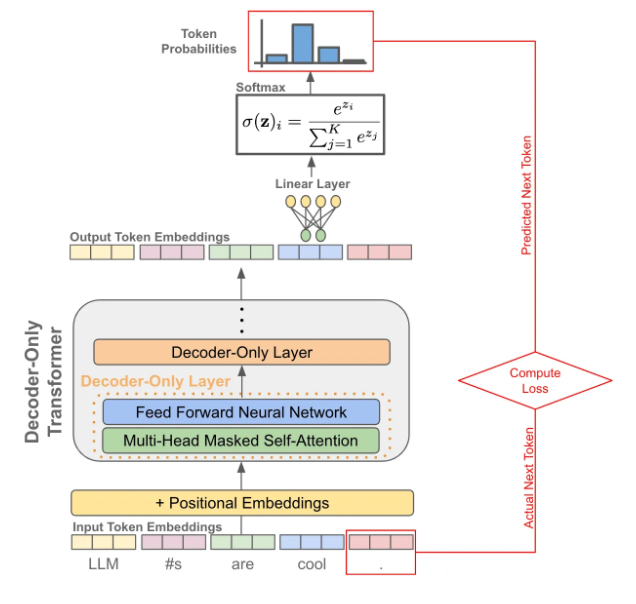

1. 自回归
整个过程就像人写句子"看到前面的词才能想后面的词"，模型每次预测都只依赖已经生成的序列，绝对不能看后面的内容，这种自回归特性，保证了生成的连贯性。

2. 输入处理  
  
- 把每个token转换成向量（Embedding），让模型能"理解"它们的含义  
- 加上位置编码，告诉模型这些token的先后顺序（Transformer本身是"不分先后"的）

3. 中间处理的"双重过滤"  

- 带掩码的自注意力：确保每个token只关注自己和前面的词（比如生成第5个词时，只能看到前4个）
- 前馈网络FFN：把注意力提取的关系特征再加工，让特征更精炼

4. 从特征到结果的"翻译"  

- 线性层：把处理好的特征映射到整个词汇表的维度，得到每个词的"得分"  
- Softmax：把得分变成概率

5. 损失计算

- 训练时，会拿模型选的token和实际应该出现的token对比，差得越多，损失就越大。模型通过不断调整参数减少这种差距

简单说，就是"看懂前文→提炼关系→算出每个词的合适度→选最合适的→不断纠错进步"的循环

### ***两大分支***

1. BERT（Encoder-only）

2. GPT（Decoder-only）